In [1]:
import networkx as nx
import numpy as np
import grakel as gk # graph kernels module-
import matplotlib.pyplot as plt
import matplotlib
import scipy
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
import math
from tqdm import tqdm # Estimation of loop time
from datetime import datetime
import os, sys

In [23]:
# wl_oa_10samples_p05_v2
# wl_oa_10samples_p05
# SVMTheta_B1000_N100_04052021
# wl_oa_B1000_N100__29042021
df_wl_subtree = pd.read_pickle("../data/ScaleFree/wl_subtree_B1000_N100_11052021.pkl")
df_wl_oa = pd.read_pickle("../data/ScaleFree/wl_OA_B1000_N100_11052021.pkl")
# df_sp = pd.read_pickle("../data/binomial/SP_B1000_N100_04052021.pkl")
# df_wl_sp = pd.read_pickle("../data/binomial/wl_SP_B1000_N100_04052021.pkl")
# df_svmTheta = pd.read_pickle("../data/binomial/svmtheta_B1000_N100_04052021.pkl")
df_pm = pd.read_pickle("../data/ScaleFree/PM_B1000_N100_12052021.pkl")
# df.columns

In [7]:
df_wl_subtree.columns


Index(['B', 'N', 'alpha', 'kernel', 'm', 'n', 'nr_nodes_1', 'nr_nodes_2',
       'power_1', 'power_2', 'power_avg_clustering', 'power_avg_degree',
       'power_avg_neigh_degree', 'power_distfree_b', 'power_distfree_u',
       'power_max_degree', 'power_median_degree', 'power_permutation_b',
       'power_permutation_u', 'power_transitivity', 'ratio_power', 'run_time',
       'timestap'],
      dtype='object')

In [8]:
np.unique(df_wl_subtree['ratio_power'])

array([1.004, 1.02 , 1.04 , 1.06 , 1.08 ])

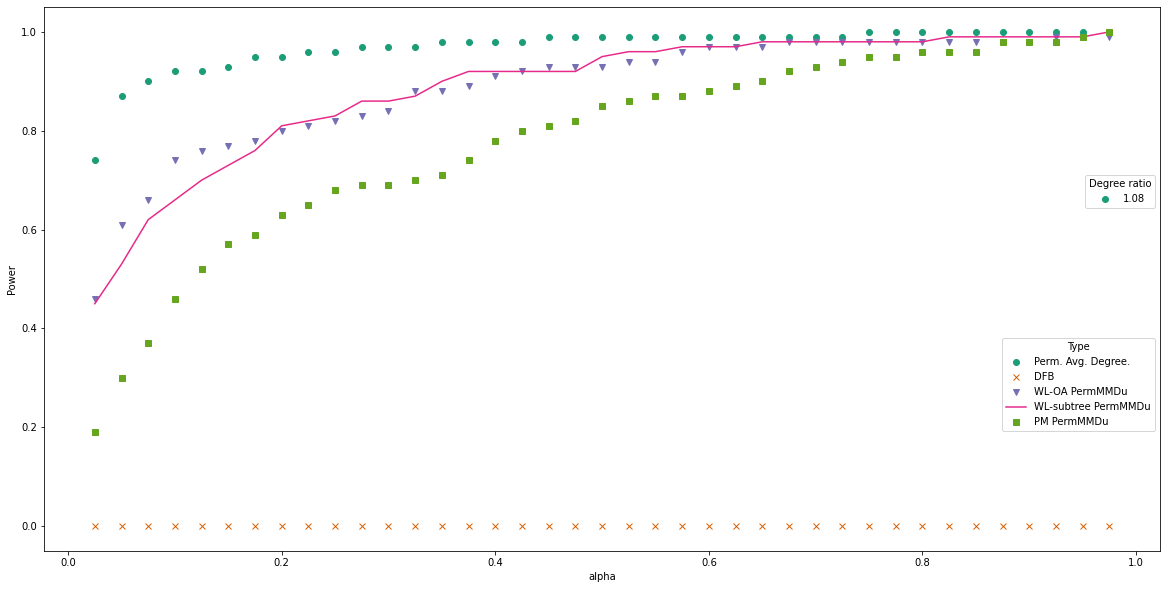

In [25]:
from matplotlib.cm import get_cmap


fig, ax = plt.subplots(figsize = (20,10))

marker = ["Perm. Avg. Degree.", 
          "DFB",
          "WL-OA PermMMDu",
          "WL-subtree PermMMDu",
          "PM PermMMDu"] 
        #   "SP PermMMDu",
        #   "WL-SP PermMMDu",
        #   "SVMTheta PermMMDu",

    
nr_marker = len(marker)

name = "Dark2" 
cmap = get_cmap(name, lut = 8) # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

n = 50
nr_nodes_1 = 20

#for j, ratio in enumerate(np.unique(df_wl_oa['ratio_degree'])[2]):
ratios = np.unique(df_wl_oa['ratio_power'])
ratio =ratios[4]
    # ax.plot(df['alpha'].loc[(df['ratio_degree'] == ratio) & (df['n'] == n) & (df['nr_nodes_1'] == nr_nodes_1)], df['power_permutation_u'].loc[(df['ratio_degree'] == ratio) & (df['n'] == n) & (df['nr_nodes_1'] == nr_nodes_1)], color = colors[j], linestyle = '-', label=str(ratio))
    
# marker 1
ax.plot(df_wl_oa['alpha'].loc[(df_wl_oa['ratio_power'] == ratio) & (df_wl_oa['n'] == n) & (df_wl_oa['nr_nodes_1'] == nr_nodes_1)], df_wl_oa['power_avg_degree'].loc[(df_wl_oa['ratio_power'] == ratio) & (df_wl_oa['n'] == n) & (df_wl_oa['nr_nodes_1'] == nr_nodes_1)], color =colors[0], linestyle = '', marker = 'o', label=str(ratio))

# marker 2
ax.plot(df_wl_oa['alpha'].loc[(df_wl_oa['ratio_power'] == ratio) & (df_wl_oa['n'] == n) & (df_wl_oa['nr_nodes_1'] == nr_nodes_1)], df_wl_oa['power_distfree_b'].loc[(df_wl_oa['ratio_power'] == ratio) & (df_wl_oa['n'] == n) & (df_wl_oa['nr_nodes_1'] == nr_nodes_1)], color =colors[1], linestyle = '', marker = 'x', label=str(ratio))

# marker 3
ax.plot(df_wl_oa['alpha'].loc[(df_wl_oa['ratio_power'] == ratio) & (df_wl_oa['n'] == n) & (df_wl_oa['nr_nodes_1'] == nr_nodes_1)], df_wl_oa['power_permutation_u'].loc[(df_wl_oa['ratio_power'] == ratio) & (df_wl_oa['n'] == n) & (df_wl_oa['nr_nodes_1'] == nr_nodes_1)], color =colors[2], linestyle = '', marker = 'v', label=str(ratio))

# marker 4
ax.plot(df_wl_subtree['alpha'].loc[(df_wl_subtree['ratio_power'] == ratio) & (df_wl_subtree['n'] == n) & (df_wl_subtree['nr_nodes_1'] == nr_nodes_1)], df_wl_subtree   ['power_permutation_u'].loc[(df_wl_subtree['ratio_power'] == ratio) & (df_wl_subtree['n'] == n) & (df_wl_subtree['nr_nodes_1'] == nr_nodes_1)], color = colors[3], linestyle = '-', label=str(ratio))

# marker 5
ax.plot(df_pm['alpha'].loc[(df_pm['ratio_power'] == ratio) & (df_pm['n'] == n) & (df_pm['nr_nodes_1'] == nr_nodes_1)], df_pm['power_permutation_u'].loc[(df_pm['ratio_power'] == ratio) & (df_pm['n'] == n) & (df_pm['nr_nodes_1'] == nr_nodes_1)], color = colors[4], linestyle = '', marker = 's', label=str(ratio))

# # marker 6
# ax.plot(df_wl_sp['alpha'].loc[(df_wl_sp['ratio_degree'] == ratio) & (df_wl_sp['n'] == n) & (df_wl_sp['nr_nodes_1'] == nr_nodes_1)], df_wl_sp['power_permutation_u'].loc[(df_wl_sp['ratio_degree'] == ratio) & (df_wl_sp['n'] == n) & (df_wl_sp['nr_nodes_1'] == nr_nodes_1)], color = colors[5], marker = "D", label=str(ratio))

# # marker 7
# ax.plot(df_svmTheta['alpha'].loc[(df_svmTheta['ratio_degree'] == ratio) & (df_svmTheta['n'] == n) & (df_svmTheta['nr_nodes_1'] == nr_nodes_1)], df_svmTheta['power_permutation_u'].loc[(df_svmTheta['ratio_degree'] == ratio) & (df_svmTheta['n'] == n) & (df_svmTheta['nr_nodes_1'] == nr_nodes_1)], color = colors[6], linestyle = 'dashed', label=str(ratio))

# # marker 8
# ax.plot(df_svmTheta['alpha'].loc[(df_svmTheta['ratio_degree'] == ratio) & (df_svmTheta['n'] == n) & (df_svmTheta['nr_nodes_1'] == nr_nodes_1)], df_svmTheta['power_permutation_u'].loc[(df_svmTheta['ratio_degree'] == ratio) & (df_svmTheta['n'] == n) & (df_svmTheta['nr_nodes_1'] == nr_nodes_1)], color = colors[7], marker = "P", label=str(ratio))

h, l = ax.get_legend_handles_labels()
# ax.legend(handles=zip(h[::3], h[1::3], h[2::3]), labels=l[::3], 
#         handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'Degree ratio')
# legend to indicate which ratio is used
first_legend = ax.legend(handles=h[::nr_marker], labels=l[::nr_marker], 
         handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'Degree ratio', bbox_to_anchor=(1, 0.7))

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)
# legend to indicate which marker is what
ax.legend(handles=h[:nr_marker], labels=marker, 
         handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'Type', bbox_to_anchor=(1, 0.4))

ax.set_xlabel('alpha')
ax.set_ylabel('Power')


plt.show()